H1-1.1.jpg - No plant detected.
H1-1.2.jpg - Plant height: 245 pixels
H1-1.3.jpg - Plant height: 1046 pixels
H1-1.4.jpg - Plant height: 1165 pixels
H1-2.1.jpg - Plant height: 1811 pixels
H1-2.2.jpg - Plant height: 1282 pixels
H1-2.3.jpg - Plant height: 1285 pixels
H1-2.4.jpg - Plant height: 1334 pixels
H1-3.1.jpg - Plant height: 1145 pixels
H1-3.2.jpg - Plant height: 1342 pixels
H1-3.3.jpg - Plant height: 1772 pixels
H1-3.4.jpg - Plant height: 1547 pixels
H1-4.1.jpg - Plant height: 1609 pixels
H1-4.2.jpg - Plant height: 1742 pixels
H1-4.3.jpg - Plant height: 1765 pixels
H1-4.4.jpg - Plant height: 1531 pixels
H1-5.1.jpg - Plant height: 1793 pixels
H1-5.2.jpg - Plant height: 1690 pixels
H1-5.3.jpg - Plant height: 1478 pixels
H1-5.4.jpg - Plant height: 1478 pixels
H1-6.1.jpg - Plant height: 1679 pixels
H1-6.2.jpg - Plant height: 1679 pixels
H1-6.3.jpg - Plant height: 1683 pixels
H1-6.4.jpg - Plant height: 1683 pixels
H1-7.1.jpg - Plant height: 1820 pixels
H1-7.2.jpg - Plant height: 1820 p

C:\Users\Sandeepa Sahil\AppData\Local\Temp\ipykernel_15100\4101613007.py:66: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


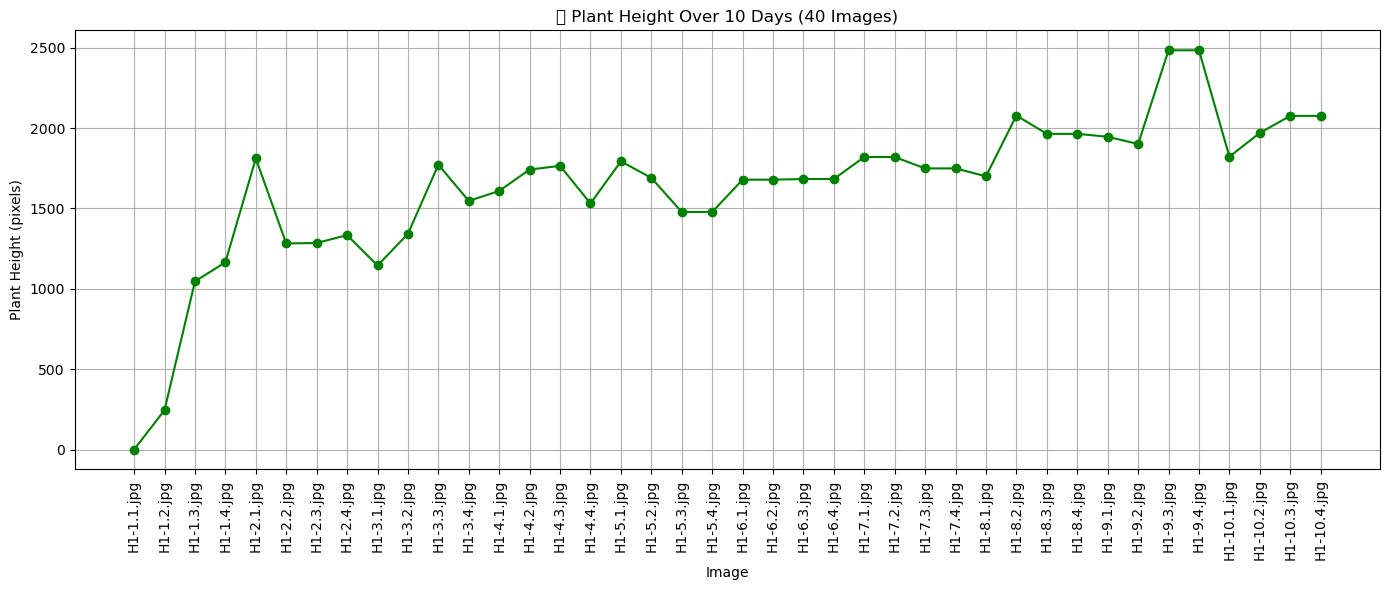

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#define folder dates and image filenames
base_path = r"C:/Users/Sandeepa Sahil/Desktop/sample code/Images"
dates = [
    "2025.02.25", "2025.02.26", "2025.02.27", "2025.02.28", "2025.03.01",
    "2025.03.02", "2025.03.03", "2025.03.04", "2025.03.05", "2025.03.06"
]

image_names = []
plant_heights = []

#image loop
for day in range(1, 11):
    for snap in range(1, 5): 
        filename = f"H1-{day}.{snap}.jpg"
        full_path = f"{base_path}/{dates[day - 1]}/{filename}"

        image = cv2.imread(full_path)
        if image is None:
            print(f"Could not load: {full_path}")
            continue

        # Crop edges
        cropped = image[100:-100, 100:-100]

        # Convert to HSV
        hsv = cv2.cvtColor(cropped, cv2.COLOR_BGR2HSV)

        # Create green mask
        lower_green = np.array([35, 40, 40])
        upper_green = np.array([85, 255, 255])
        mask = cv2.inRange(hsv, lower_green, upper_green)

        # Morphological cleanup
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        coords = np.column_stack(np.where(mask > 0))

        if len(coords) == 0:
            print(f"{filename} - No plant detected.")
            image_names.append(filename)
            plant_heights.append(0)
            continue

        top_y = np.min(coords[:, 0])
        bottom_y = np.max(coords[:, 0])
        height = bottom_y - top_y

        image_names.append(filename)
        plant_heights.append(height)
        print(f"{filename} - Plant height: {height} pixels")

# Plot graph
plt.figure(figsize=(14, 6))
plt.plot(image_names, plant_heights, marker='o', linestyle='-', color='green')
plt.xticks(rotation=90)
plt.xlabel("Image")
plt.ylabel("Plant Height (pixels)")
plt.title("Plant Height Over 10 Days (40 Images)")
plt.grid(True)
plt.tight_layout()
plt.show()
